<a href="https://colab.research.google.com/github/Bokocki/135UM-Homework/blob/main/Homework02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Homework Assignment: EM Clustering in 2D**
-------------------------------

You have seen how the **Expectation-Maximization (EM)** algorithm can fit a Gaussian Mixture Model (GMM) to a 2D dataset. You should now explore:

## **Primary Question**

**How can we visualize the *decision boundary* for attributing a *new* (unlabeled) point to one of the GMM clusters?**  

In other words, given a 2D data distribution modeled by EM, think of a way to clearly show (on a plot) *which* cluster a point would be assigned to (or which cluster has the highest responsibility (posterior probability) for that point)?  

The plot should comprehensively cover the entire visible region, ensuring that for any point on the plot, it is immediately evident which cluster it would belong to. You can plot **lines** separating clusters or use a **color map** showing each point's "most likely cluster".

You can illustrate your approach with **the same** 2D dataset that we used in class, or you can find another suitable 2D dataset, it's up to you. Note however, that having 3 clusters enhances the clarity of the visualization—while 2 clusters result in overly simple boundaries, using 4 or more clusters can make the entire plot difficult to interpret. Try to choose a dataset with 3 clusters.

Discuss any irregularities observed in the resulting plot. If a decision boundary suggests that a region should be attributed to a cluster in a counterintuitive way (we saw it in class!), provide an explanation for why this might occur. It may be also an indication you have a bug in your code.

## **Secondary Question**

**If we *didn't know* the number of clusters in advance, how could we decide on a suitable $K$ for the clustering algorithm?**  

You can illustrate your approach with **the same** dataset as in the primary question by trying different values of $K$ (and optionally plotting the evaluation metric values, e.g. silhouette scores, etc.). Or you can find another suitable dataset, it's up to you. Note, that the dataset doesn't need to be 2D in this task.

## **Task & Deliverables**

1. **Colab Notebook**  
   - Create a **Colab notebook** that:
     - Clearly **answers** both the **primary** and **secondary** questions with appropriate plots and short explanations.
     - Uses Python code (e.g. `scikit-learn` for GMM) to visualize:
       1. The **data** and **cluster assignments**.
       2. The **decision boundary** (lines or a color map) indicating each cluster's region.
       3. A demonstration (chart or table) of how you would pick a suitable number of clusters $K$ when it is not known.
   - Remember to use the `$` symbol to delimit **inline equations** and `$$` to delimit **full-line equations**.

2. **Publish on GitHub**  
   - Place the Colab notebook in your **GitHub repository** for this course.
   - In your repository’s **README**, add a **link** to the notebook and also include an **“Open in Colab”** badge at the top of the notebook so it can be launched directly from GitHub.



# **Homework solution**

## **Visualisation of the decision boundaries**

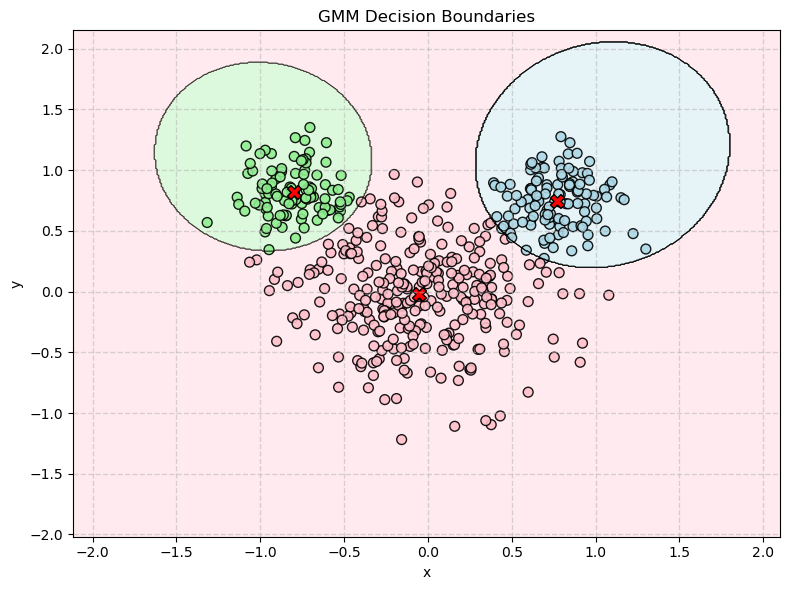

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.mixture import GaussianMixture

# ----------------------------------------------------------------------
# SECTION 1: Generate the "mouse" dataset
# ----------------------------------------------------------------------
np.random.seed(0)

# 1) 300 points from N([0, 0], [[0.16, 0],[0, 0.16]])
mean1 = np.array([0.0, 0.0])
cov1 = np.array([[0.16, 0.0],
                 [0.0,  0.16]])
data1 = np.random.multivariate_normal(mean1, cov1, 300)

# 2) 100 points from N([0.8, 0.8], [[0.04, 0],[0, 0.04]])
mean2 = np.array([0.8, 0.8])
cov2 = np.array([[0.04, 0.0],
                 [0.0,  0.04]])
data2 = np.random.multivariate_normal(mean2, cov2, 100)

# 3) 100 points from N([-0.8, 0.8], [[0.04, 0],[0, 0.04]])
mean3 = np.array([-0.8, 0.8])
cov3 = np.array([[0.04, 0.0],
                 [0.0,  0.04]])
data3 = np.random.multivariate_normal(mean3, cov3, 100)

# Combine all data
data_X = np.vstack([data1, data2, data3])

# ----------------------------------------------------------------------
# SECTION 2: Fit a Gaussian Mixture Model using scikit-learn
# ----------------------------------------------------------------------
K = 3  # Number of clusters
gmm = GaussianMixture(n_components=K, random_state=0)
gmm.fit(data_X)  # Fit the model to the data

# Get the parameters of the fitted GMM
pi = gmm.weights_  # Mixture weights
mu = gmm.means_    # Cluster means
Sigma = gmm.covariances_  # Cluster covariances

# Compute responsibilities for the original data
resp = gmm.predict_proba(data_X)

# ----------------------------------------------------------------------
# SECTION 3: Visualize the decision boundaries
# ----------------------------------------------------------------------

# Create a mesh grid covering the entire visible region
x_min, x_max = data_X[:, 0].min() - 0.8, data_X[:, 0].max() + 0.8
y_min, y_max = data_X[:, 1].min() - 0.8, data_X[:, 1].max() + 0.8
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))
grid_points = np.c_[xx.ravel(), yy.ravel()]

# Compute responsibilities for each point on the grid
grid_resp = gmm.predict_proba(grid_points)
grid_labels = np.argmax(grid_resp, axis=1)  # Assign to the cluster with the highest responsibility

# Reshape the grid labels for plotting
grid_labels = grid_labels.reshape(xx.shape)

# Define a custom colormap for the three clusters
cmap = ListedColormap(['pink', 'lightgreen', 'lightblue'])

# Plot the decision boundaries with colored regions
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, grid_labels, cmap=cmap, alpha=0.3)

# Add contour lines to show the decision boundaries
plt.contour(xx, yy, grid_labels, colors='black', linewidths=0.2)

# Plot the original data points
plt.scatter(data_X[:, 0], data_X[:, 1], c=np.argmax(resp, axis=1), cmap=cmap, edgecolor='k', s=50, alpha=0.9)

# Plot cluster centers
plt.scatter(mu[:, 0], mu[:, 1], c='red', marker='X', s=100, edgecolor='k')

# Add titles and labels
plt.title('GMM Decision Boundaries')
plt.xlabel('x')
plt.ylabel('y')

# Improve layout and spacing
plt.tight_layout()
plt.grid(True, linestyle='--', linewidth=1, alpha=0.5)
plt.show()

## **Discussion of the decision boundaries**

As we can see in the plot, the boundaries of two of the clusters are roughly elliptical, which is expected given that the data was generated from Gaussian distributions. However, one notable observation is that most of the plane is assigned to a single cluster, rather than being partitioned into three distinct regions. Instead of dividing the plane into three connected segments, the clustering algorithm assigns two small regions to the smaller clusters, while the majority of the plane is attributed to the cluster with the highest variance.

This behavior can be explained by the properties of Gaussian distributions. Points are assigned to clusters based on the relative probabilities of the Gaussian components. If the EM algorithm converges to the true parameters of the data-generating distributions, it makes sense that points far from the clusters are assigned to the component with the highest variance. This is because the probability density of a Gaussian distribution decays rapidly with distance, and the component with the largest variance will dominate in regions far from the other clusters.

To further illustrate this, consider a modified simulation where the cluster with the most points has a smaller variance. In this case, the cluster with the most points no longer dominates the decision boundaries across the entire plane, in effect, the regions assigned to the smaller clusters expand. This demonstrates how the relative variances and mixture weights of the Gaussian components influence the shape and extent of the decision boundaries.

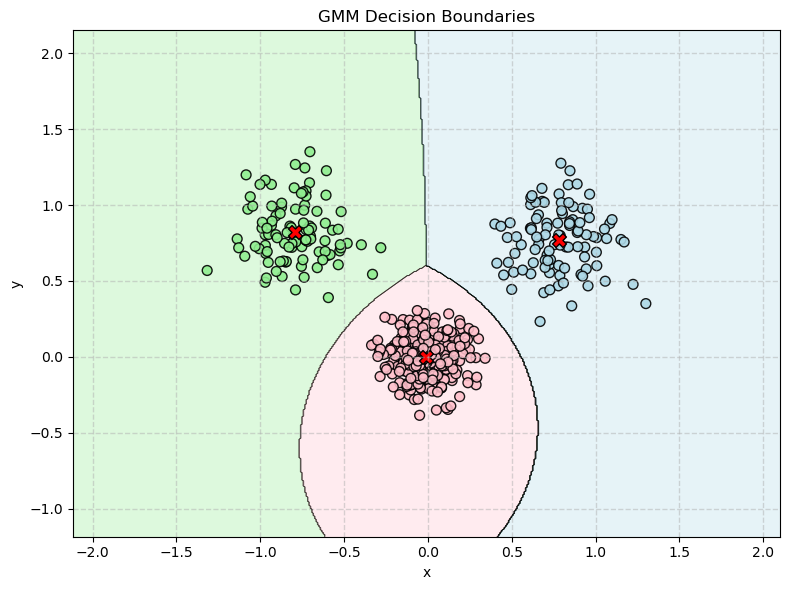

In [2]:
# ----------------------------------------------------------------------
# SECTION 1: Generate the "mouse" dataset
# ----------------------------------------------------------------------
np.random.seed(0)

# 1) 300 points from N([0, 0], [[0.016, 0],[0, 0.016]])
mean1 = np.array([0.0, 0.0])
cov1 = np.array([[0.016, 0.0],
                 [0.0,  0.016]])
data1 = np.random.multivariate_normal(mean1, cov1, 300)

# 2) 100 points from N([0.8, 0.8], [[0.04, 0],[0, 0.04]])
mean2 = np.array([0.8, 0.8])
cov2 = np.array([[0.04, 0.0],
                 [0.0,  0.04]])
data2 = np.random.multivariate_normal(mean2, cov2, 100)

# 3) 100 points from N([-0.8, 0.8], [[0.04, 0],[0, 0.04]])
mean3 = np.array([-0.8, 0.8])
cov3 = np.array([[0.04, 0.0],
                 [0.0,  0.04]])
data3 = np.random.multivariate_normal(mean3, cov3, 100)

# Combine all data
data_X = np.vstack([data1, data2, data3])

# ----------------------------------------------------------------------
# SECTION 2: Fit a Gaussian Mixture Model using scikit-learn
# ----------------------------------------------------------------------
K = 3  # Number of clusters
gmm = GaussianMixture(n_components=K, random_state=0)
gmm.fit(data_X)  # Fit the model to the data

# Get the parameters of the fitted GMM
pi = gmm.weights_  # Mixture weights
mu = gmm.means_    # Cluster means
Sigma = gmm.covariances_  # Cluster covariances

# Compute responsibilities for the original data
resp = gmm.predict_proba(data_X)

# ----------------------------------------------------------------------
# SECTION 3: Visualize the decision boundaries
# ----------------------------------------------------------------------

# Create a mesh grid covering the entire visible region
x_min, x_max = data_X[:, 0].min() - 0.8, data_X[:, 0].max() + 0.8
y_min, y_max = data_X[:, 1].min() - 0.8, data_X[:, 1].max() + 0.8
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))
grid_points = np.c_[xx.ravel(), yy.ravel()]

# Compute responsibilities for each point on the grid
grid_resp = gmm.predict_proba(grid_points)
grid_labels = np.argmax(grid_resp, axis=1)  # Assign to the cluster with the highest responsibility

# Reshape the grid labels for plotting
grid_labels = grid_labels.reshape(xx.shape)

# Define a custom colormap for the three clusters
cmap = ListedColormap(['pink', 'lightgreen', 'lightblue'])

# Plot the decision boundaries with colored regions
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, grid_labels, cmap=cmap, alpha=0.3)

# Add contour lines to show the decision boundaries
plt.contour(xx, yy, grid_labels, colors='black', linewidths=0.2)

# Plot the original data points
plt.scatter(data_X[:, 0], data_X[:, 1], c=np.argmax(resp, axis=1), cmap=cmap, edgecolor='k', s=50, alpha=0.9)

# Plot cluster centers
plt.scatter(mu[:, 0], mu[:, 1], c='red', marker='X', s=100, edgecolor='k')

# Add titles and labels
plt.title('GMM Decision Boundaries')
plt.xlabel('x')
plt.ylabel('y')

# Improve layout and spacing
plt.tight_layout()
plt.grid(True, linestyle='--', linewidth=1, alpha=0.5)
plt.show()

In the next simulation all three clusters have the same variance and the decision boundaries look balanced.

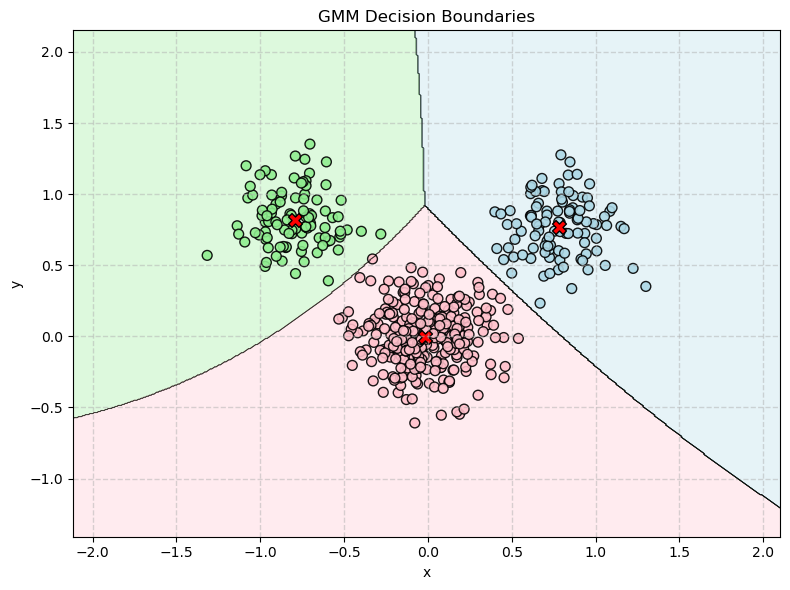

In [3]:
# ----------------------------------------------------------------------
# SECTION 1: Generate the "mouse" dataset
# ----------------------------------------------------------------------
np.random.seed(0)

# 1) 300 points from N([0, 0], [[0.04, 0],[0, 0.04]])
mean1 = np.array([0.0, 0.0])
cov1 = np.array([[0.04, 0.0],
                 [0.0,  0.04]])
data1 = np.random.multivariate_normal(mean1, cov1, 300)

# 2) 100 points from N([0.8, 0.8], [[0.04, 0],[0, 0.04]])
mean2 = np.array([0.8, 0.8])
cov2 = np.array([[0.04, 0.0],
                 [0.0,  0.04]])
data2 = np.random.multivariate_normal(mean2, cov2, 100)

# 3) 100 points from N([-0.8, 0.8], [[0.04, 0],[0, 0.04]])
mean3 = np.array([-0.8, 0.8])
cov3 = np.array([[0.04, 0.0],
                 [0.0,  0.04]])
data3 = np.random.multivariate_normal(mean3, cov3, 100)

# Combine all data
data_X = np.vstack([data1, data2, data3])

# ----------------------------------------------------------------------
# SECTION 2: Fit a Gaussian Mixture Model using scikit-learn
# ----------------------------------------------------------------------
K = 3  # Number of clusters
gmm = GaussianMixture(n_components=K, random_state=0)
gmm.fit(data_X)  # Fit the model to the data

# Get the parameters of the fitted GMM
pi = gmm.weights_  # Mixture weights
mu = gmm.means_    # Cluster means
Sigma = gmm.covariances_  # Cluster covariances

# Compute responsibilities for the original data
resp = gmm.predict_proba(data_X)

# ----------------------------------------------------------------------
# SECTION 3: Visualize the decision boundaries
# ----------------------------------------------------------------------

# Create a mesh grid covering the entire visible region
x_min, x_max = data_X[:, 0].min() - 0.8, data_X[:, 0].max() + 0.8
y_min, y_max = data_X[:, 1].min() - 0.8, data_X[:, 1].max() + 0.8
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))
grid_points = np.c_[xx.ravel(), yy.ravel()]

# Compute responsibilities for each point on the grid
grid_resp = gmm.predict_proba(grid_points)
grid_labels = np.argmax(grid_resp, axis=1)  # Assign to the cluster with the highest responsibility

# Reshape the grid labels for plotting
grid_labels = grid_labels.reshape(xx.shape)

# Define a custom colormap for the three clusters
cmap = ListedColormap(['pink', 'lightgreen', 'lightblue'])

# Plot the decision boundaries with colored regions
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, grid_labels, cmap=cmap, alpha=0.3)

# Add contour lines to show the decision boundaries
plt.contour(xx, yy, grid_labels, colors='black', linewidths=0.2)

# Plot the original data points
plt.scatter(data_X[:, 0], data_X[:, 1], c=np.argmax(resp, axis=1), cmap=cmap, edgecolor='k', s=50, alpha=0.9)

# Plot cluster centers
plt.scatter(mu[:, 0], mu[:, 1], c='red', marker='X', s=100, edgecolor='k')

# Add titles and labels
plt.title('GMM Decision Boundaries')
plt.xlabel('x')
plt.ylabel('y')

# Improve layout and spacing
plt.tight_layout()
plt.grid(True, linestyle='--', linewidth=1, alpha=0.5)
plt.show()

## **Choosing the number of clusters (the K)**

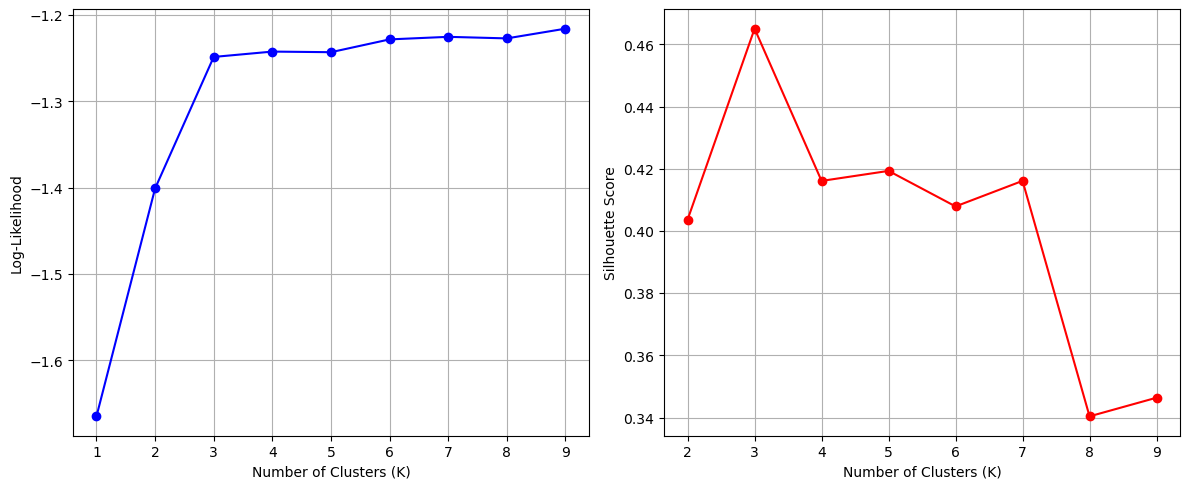

In [4]:
from sklearn.metrics import silhouette_score

# ----------------------------------------------------------------------
# SECTION 1: Generate the "mouse" dataset
# ----------------------------------------------------------------------
np.random.seed(0)

# 1) 300 points from N([0, 0], [[0.16, 0],[0, 0.16]])
mean1 = np.array([0.0, 0.0])
cov1 = np.array([[0.16, 0.0],
                 [0.0,  0.16]])
data1 = np.random.multivariate_normal(mean1, cov1, 300)

# 2) 100 points from N([0.8, 0.8], [[0.04, 0],[0, 0.04]])
mean2 = np.array([0.8, 0.8])
cov2 = np.array([[0.04, 0.0],
                 [0.0,  0.04]])
data2 = np.random.multivariate_normal(mean2, cov2, 100)

# 3) 100 points from N([-0.8, 0.8], [[0.04, 0],[0, 0.04]])
mean3 = np.array([-0.8, 0.8])
cov3 = np.array([[0.04, 0.0],
                 [0.0,  0.04]])
data3 = np.random.multivariate_normal(mean3, cov3, 100)

# Combine all data
data_X = np.vstack([data1, data2, data3])

# ----------------------------------------------------------------------
# SECTION 2: Compute log-likelihood and silhouette score for different K
# ----------------------------------------------------------------------
K_values = range(1, 10)
log_likelihoods = []
silhouette_scores = []

for K in K_values:
    gmm = GaussianMixture(n_components=K, random_state=0)
    gmm.fit(data_X)
    
    # Compute log-likelihood
    log_likelihoods.append(gmm.score(data_X))  # Average log-likelihood per sample
    
    # Compute silhouette score
    labels = gmm.predict(data_X)
    if K > 1:  # Silhouette score requires at least 2 clusters
        silhouette_scores.append(silhouette_score(data_X, labels))
    else:
        silhouette_scores.append(np.nan)

# ----------------------------------------------------------------------
# SECTION 3: Plot the results
# ----------------------------------------------------------------------
plt.figure(figsize=(12, 5))

# Plot log-likelihood
plt.subplot(1, 2, 1)
plt.plot(K_values, log_likelihoods, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Log-Likelihood')
plt.grid(True)

# Plot silhouette score
plt.subplot(1, 2, 2)
plt.plot(K_values[1:], silhouette_scores[1:], marker='o', linestyle='-', color='r')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.grid(True)

plt.tight_layout()
plt.show()

To choose an appropriate value for K, we can use either the likelihood-based approach or the silhouette score.

In the likelihood-based approach, for each K, we run the EM algorithm to estimate the parameters of the Gaussian Mixture Model (GMM). Using these parameters, we compute the likelihood of the observed data, which represents the probability of the data given the model. As K increases, the likelihood naturally increases because the model becomes more flexible and can fit the data more closely. However, beyond a certain point, the increase in likelihood slows down significantly, indicating that additional clusters do not provide meaningful insights and may lead to overfitting. For this dataset, the plot shows that K=3 is the point where the increase in likelihood begins to slow down, suggesting that K=3 is the optimal number of clusters.

In the silhouette score approach, we calculate the silhouette score for each K. The silhouette score measures the quality of clustering by evaluating how close points are to others in the same cluster and how distinct clusters are from each other. A higher silhouette score indicates better-defined clusters. By plotting the silhouette score for different values of K, we can identify the K that maximizes this score. For this dataset, the plot shows that K=3 achieves the highest silhouette score.

Both methods lead us to conclude that K=3 is the appropriate number of clusters for this dataset, which aligns with the fact that the data was generated from three Gaussian distributions.